In [1]:
import pandas as pd

test4

In [12]:
#read the files


df_1400_U = pd.read_excel('U1400.xlsx',sheet_name=['U1400P4S01','U1400P4S02','U1400P4S03'])
df_1401_U = pd.read_excel('U1401.xlsx',sheet_name=['U1401P4S01','U1401P4S02','U1401P4S03'])

In [13]:
df_1400_Ua = df_1400_U['U1400P4S01']
df_1400_Ub = df_1400_U['U1400P4S02']
df_1400_Uc = df_1400_U['U1400P4S03']

df_1401_Ua = df_1401_U['U1401P4S01']
df_1401_Ub = df_1401_U['U1401P4S02']
df_1401_Uc = df_1401_U['U1401P4S03']

In [14]:
df_1400_Ua['year']=1400
df_1400_Ub['year']=1400
df_1400_Uc['year']=1400

df_1401_Ua['year']=1401
df_1401_Ub['year']=1401
df_1401_Uc['year']=1401

In [15]:
df_a=pd.concat([df_1400_Ua,df_1401_Ua])
df_b=pd.concat([df_1400_Ub,df_1401_Ub])
df_c=pd.concat([df_1400_Uc,df_1401_Uc])


In [16]:
df_c

,Address,member,income_pension,income_rent,income_interest,income_aid,income_resale,income_transfer,Fasl,year,DYCOL00
0,10001000226,1.0,0420000000,NaN,NaN,15400000.0,NaN,NaN,1,1400,NaN
1,10003003229,1.0,NaN,NaN,2000000.0,20640000.0,NaN,NaN,1,1400,NaN
2,10003003229,3.0,0042000000,NaN,NaN,NaN,NaN,NaN,1,1400,NaN
3,10011009725,1.0,NaN,NaN,12360000.0,8000000.0,NaN,NaN,1,1400,NaN
4,10011009720,1.0,NaN,NaN,16560000.0,10000000.0,NaN,NaN,1,1400,NaN
...,...,...,...,...,...,...,...,...,...,...,...
26778,13006383827,1.0,0,0.0,0.0,26220000.0,0.0,0.0,2,1401,NaN
26779,13006383832,1.0,0,0.0,100000000.0,38370000.0,0.0,0.0,2,1401,NaN
26780,13006383835,1.0,750000000,0.0,0.0,26400000.0,0.0,0.0,2,1401,NaN
26781,13006383838,1.0,0,0.0,0.0,38370000.0,0.0,0.0,2,1401,NaN


In [17]:
df_a=df_a[['Address','member','income_w_y','year']]
df_b=df_b[['Address','member','sale','year']]
df_c=df_c.drop(['Fasl','DYCOL00'],axis=1)

In [18]:

df_c = df_c.apply(pd.to_numeric, errors='coerce') 

In [19]:
df_c['total_other'] = df_c['income_pension'] + df_c['income_rent'] + df_c['income_interest'] + df_c['income_aid'] + df_c['income_resale'] + df_c['income_transfer']

In [20]:
df_c= df_c.drop(['income_pension', 'income_rent', 'income_interest',
       'income_aid', 'income_resale', 'income_transfer'],axis=1)

In [21]:
df_c

,Address,member,year,total_other
0,10001000226,1.0,1400,NaN
1,10003003229,1.0,1400,NaN
2,10003003229,3.0,1400,NaN
3,10011009725,1.0,1400,NaN
4,10011009720,1.0,1400,NaN
...,...,...,...,...
26778,13006383827,1.0,1401,26220000.0
26779,13006383832,1.0,1401,138370000.0
26780,13006383835,1.0,1401,776400000.0
26781,13006383838,1.0,1401,38370000.0


In [22]:
df_ab = pd.merge(df_a, df_b, on=['Address','member','year'] ,how='outer')

df_all = pd.merge(df_ab, df_c,on=['Address','member','year'] , how='outer')
df_all

,Address,member,income_w_y,year,sale,total_other
0,10003003229,1.0,555000000.0,1400,75000000.0,NaN
1,10003003229,1.0,555000000.0,1400,86000000.0,NaN
2,10011009725,1.0,480000000.0,1400,NaN,NaN
3,10011009729,2.0,198000000.0,1400,NaN,NaN
4,10011009721,1.0,230000000.0,1400,NaN,NaN
...,...,...,...,...,...,...
63945,13003381541,1.0,NaN,1401,NaN,8.843700e+08
63946,13005382228,1.0,NaN,1401,NaN,9.006400e+08
63947,13006383029,1.0,NaN,1401,NaN,1.130460e+09
63948,13006383035,1.0,NaN,1401,NaN,1.144290e+09


In [23]:
df_all.fillna(0,inplace=True)

In [24]:
df_all

,Address,member,income_w_y,year,sale,total_other
0,10003003229,1.0,555000000.0,1400,75000000.0,0.000000e+00
1,10003003229,1.0,555000000.0,1400,86000000.0,0.000000e+00
2,10011009725,1.0,480000000.0,1400,0.0,0.000000e+00
3,10011009729,2.0,198000000.0,1400,0.0,0.000000e+00
4,10011009721,1.0,230000000.0,1400,0.0,0.000000e+00
...,...,...,...,...,...,...
63945,13003381541,1.0,0.0,1401,0.0,8.843700e+08
63946,13005382228,1.0,0.0,1401,0.0,9.006400e+08
63947,13006383029,1.0,0.0,1401,0.0,1.130460e+09
63948,13006383035,1.0,0.0,1401,0.0,1.144290e+09


In [25]:
df_all['income'] = df_all[['income_w_y', 'sale', 'total_other']].sum(axis=1)
df_all

,Address,member,income_w_y,year,sale,total_other,income
0,10003003229,1.0,555000000.0,1400,75000000.0,0.000000e+00,6.300000e+08
1,10003003229,1.0,555000000.0,1400,86000000.0,0.000000e+00,6.410000e+08
2,10011009725,1.0,480000000.0,1400,0.0,0.000000e+00,4.800000e+08
3,10011009729,2.0,198000000.0,1400,0.0,0.000000e+00,1.980000e+08
4,10011009721,1.0,230000000.0,1400,0.0,0.000000e+00,2.300000e+08
...,...,...,...,...,...,...,...
63945,13003381541,1.0,0.0,1401,0.0,8.843700e+08,8.843700e+08
63946,13005382228,1.0,0.0,1401,0.0,9.006400e+08,9.006400e+08
63947,13006383029,1.0,0.0,1401,0.0,1.130460e+09,1.130460e+09
63948,13006383035,1.0,0.0,1401,0.0,1.144290e+09,1.144290e+09


In [26]:
df_test4=df_all[['Address','member','income','year']]
df_test4

,Address,member,income,year
0,10003003229,1.0,6.300000e+08,1400
1,10003003229,1.0,6.410000e+08,1400
2,10011009725,1.0,4.800000e+08,1400
3,10011009729,2.0,1.980000e+08,1400
4,10011009721,1.0,2.300000e+08,1400
...,...,...,...,...
63945,13003381541,1.0,8.843700e+08,1401
63946,13005382228,1.0,9.006400e+08,1401
63947,13006383029,1.0,1.130460e+09,1401
63948,13006383035,1.0,1.144290e+09,1401


In [27]:
df_test4=df_test4.sort_values(by='year')
df_test4

,Address,member,income,year
0,10003003229,1.0,6.300000e+08,1400
49071,12708339123,3.0,0.000000e+00,1400
49070,12708339123,1.0,0.000000e+00,1400
49069,12708339120,2.0,0.000000e+00,1400
49068,12708339120,1.0,0.000000e+00,1400
...,...,...,...,...
24479,12708338932,1.0,2.269500e+08,1401
24480,12708339329,1.0,5.998950e+08,1401
24481,12708339331,1.0,1.393600e+09,1401
24475,12708338529,1.0,3.098250e+08,1401


In [30]:
df_test4

,Address,member,income,year
0,10003003229,1.0,6.300000e+08,1400
49071,12708339123,3.0,0.000000e+00,1400
49070,12708339123,1.0,0.000000e+00,1400
49069,12708339120,2.0,0.000000e+00,1400
49068,12708339120,1.0,0.000000e+00,1400
...,...,...,...,...
24479,12708338932,1.0,2.269500e+08,1401
24480,12708339329,1.0,5.998950e+08,1401
24481,12708339331,1.0,1.393600e+09,1401
24475,12708338529,1.0,3.098250e+08,1401


In [29]:
df_test4.to_csv('df_test4.csv',index=False)

In [31]:
df_test4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63950 entries, 0 to 63949
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Address  63950 non-null  int64  
 1   member   63950 non-null  float64
 2   income   63950 non-null  float64
 3   year     63950 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 2.4 MB


In [32]:
df_test4.describe()

,Address,member,income,year
count,6.395000e+04,63950.000000,6.395000e+04,63950.000000
mean,1.154435e+10,1.674605,7.244200e+08,1400.507975
std,8.871642e+08,1.057036,2.567117e+09,0.499940
min,1.000100e+10,0.000000,0.000000e+00,1400.000000
25%,1.081310e+10,1.000000,1.000000e+07,1400.000000
50%,1.150619e+10,1.000000,4.200000e+08,1401.000000
75%,1.230128e+10,2.000000,8.400000e+08,1401.000000
max,1.300638e+10,11.000000,2.702800e+11,1401.000000


In [35]:
df_test4.isna().sum()

Address    0
member     0
income     0
year       0
dtype: int64

In [37]:
income_1400 = df_test4[df_test4.year == 1400].income
income_1401 = df_test4[df_test4.year == 1401].income
income_1400

0        630000000.0
49071            0.0
49070            0.0
49069            0.0
49068            0.0
            ...     
4150     180000000.0
4134     744000000.0
4148     288000000.0
4147     660000000.0
4149      30000000.0
Name: income, Length: 31465, dtype: float64

In [38]:
income_1401

63285    1.547000e+07
63294    5.470000e+06
63295    7.470000e+06
63292    3.000000e+06
63296    2.000000e+06
             ...     
24479    2.269500e+08
24480    5.998950e+08
24481    1.393600e+09
24475    3.098250e+08
63949    7.764000e+08
Name: income, Length: 32485, dtype: float64

In [39]:
mean_income_1400 = income_1400.mean()
mean_income_1401 = income_1401.mean()

print('Mean Income in 1400: ', mean_income_1400)
print('Mean Income in 1401: ', mean_income_1401)

Mean Income in 1400:  532488969.33621484
Mean Income in 1401:  910324607.1138064


In [40]:
median_income_1400 = income_1400.median()
median_income_1401 = income_1401.median()

print('Median Income in 1400: ', median_income_1400)
print('Median Income in 1401: ', median_income_1401)

Median Income in 1400:  240000000.0
Median Income in 1401:  620000000.0


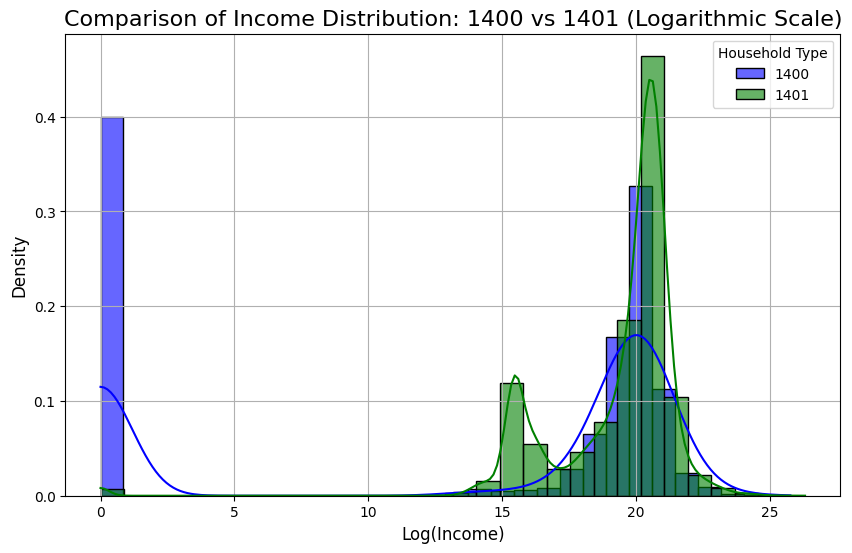

In [60]:
import numpy as np

plt.figure(figsize=(10,6))
income_log_1400 = np.log1p(income_1400)
income_log_1401 = np.log1p(income_1401)
sns.histplot(income_log_1400, color='blue', kde=True, label='1400', stat='density', bins=30, alpha=0.6)
sns.histplot(income_log_1401, color='green', kde=True, label='1401', stat='density', bins=30, alpha=0.6)
plt.title('Comparison of Income Distribution: 1400 vs 1401 (Logarithmic Scale)', fontsize=16)
plt.xlabel('Log(Income)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title="Household Type")
plt.grid(True)
plt.show()


In [67]:
from scipy.stats import shapiro

stat_1400, p_1400 = shapiro(income_1400)
stat_1401, p_1401 = shapiro(income_1401)

print(f"1400: stat = {stat_1400}, p_value = {p_1400}")
print(f"1401: stat = {stat_1401}, p_value = {p_1401}")

1400: stat = 0.1461222767829895, p_value = 0.0
1401: stat = 0.17333418130874634, p_value = 0.0


In [74]:
from scipy.stats import mannwhitneyu

u_stat, p_value = mannwhitneyu(income_1400, income_1401, alternative='greater')
print(f"stat = {u_stat}, p_value = {p_value}")

stat = 322775883.0, p_value = 1.0


In [75]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(income_1400, income_1401)
print(f"stat = {t_stat}, p_value = {p_value}")

stat = -18.65811329034589, p_value = 1.744238150544083e-77


### second approach

In [78]:
import pandas as pd
from scipy import stats


data_1400 = df_test4[df_test4['year'] == 1400]['income']
data_1401 = df_test4[df_test4['year'] == 1401]['income']

mean_1400 = data_1400.mean()
mean_1401 = data_1401.mean()
std_1400 = data_1400.std(ddof=1) 
std_1401 = data_1401.std(ddof=1)

n_1400 = len(data_1400)
n_1401 = len(data_1401)

t_statistic, p_value = stats.ttest_ind(data_1401, data_1400, alternative='greater')

alpha = 0.05

print(f'Mean Income 1400: {mean_1400}')
print(f'Mean Income 1401: {mean_1401}')
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

if p_value < alpha:
    print("Reject the null hypothesis: There is sufficient evidence that income increased in 1401.")
else:
    print("Fail to reject the null hypothesis: There is insufficient evidence that income increased in 1401.")

Mean Income 1400: 532488969.33621484
Mean Income 1401: 910324607.1138064
T-statistic: 18.65811329034589
P-value: 8.721190752720414e-78
Reject the null hypothesis: There is sufficient evidence that income increased in 1401.


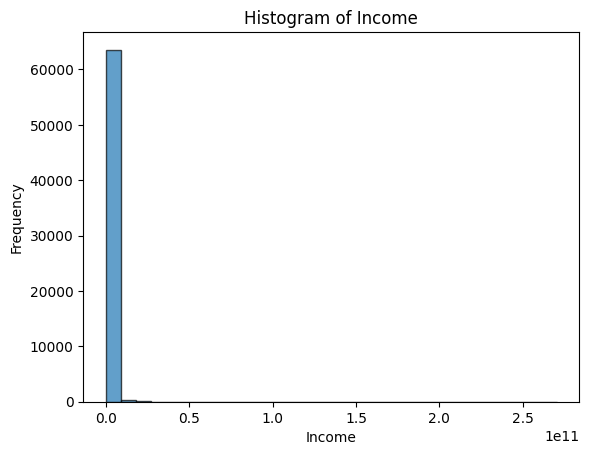

In [81]:
import matplotlib.pyplot as plt

plt.hist(df_test4['income'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

In [86]:
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(data_1400, data_1401, alternative='less')
print(f'Statistic: {stat}, P-value: {p}')

if p < 0.05:
    print("Reject the null hypothesis: There is a significant difference between the two groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference between the two groups.")

Statistic: 322775883.0, P-value: 0.0
Reject the null hypothesis: There is a significant difference between the two groups.


In [85]:
from scipy.stats import ttest_ind

t_statistic, p_value = ttest_ind(data_1400, data_1401, alternative='less')
print(f'T-statistic: {t_statistic}, P-value: {p_value}')

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference between the two groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference between the two groups.")

T-statistic: -18.65811329034589, P-value: 8.721190752720414e-78
Reject the null hypothesis: There is a significant difference between the two groups.
